<a href="https://colab.research.google.com/github/theripnono/custom_dataset-image_augmentation/blob/main/Custom_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook is written a short code to generate new images from a small image dataset with a **data augmentation** 📷 package.

This usecase is interesting if you have a small dataset of images and you want to improve your deep learning algorithms generating synthetic images.

Note: This script is not as powerfull as online platforms like: MakeSanse AI or Roboflow, etc... It just to contibute to comunity and make larger datasets.  

In [ ]:
#Unzip my on own Image Dataset in "content" path
!unzip /content/drive/MyDrive/orange_dataset.zip -d /content/

In [2]:
#Operate on images
import imgaug.augmenters as iaa
import cv2
import glob
from PIL import Image

#Folders
import os
from google.colab.patches import cv2_imshow #cv2 package for colab
import matplotlib.pyplot as plt

In [3]:
#Root Path
orange_mature_folder = "/content/orange_dataset/Orange"
orange_inmature_folder = "/content/orange_dataset/Green_Orange"


In [15]:
# Load Dataset
imgs = []

path_imgs = glob.glob(orange_inmature_folder + "/*")

for img_path in path_imgs:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    imgs.append(img)

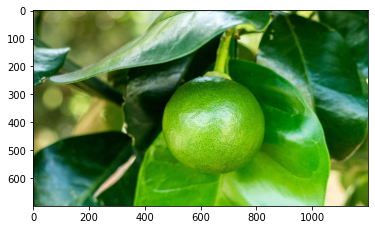

In [16]:
#Visualize

%matplotlib inline
imgplot = plt.imshow(imgs[50])


In [17]:
#Data Augmentation

seq = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontal flips
    iaa.Crop(percent=(0, 0.1)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(
        0.5,
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    # Strengthen or weaken the contrast in each image.
    iaa.LinearContrast((0.75, 1.5)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-25, 25),
        shear=(-8, 8)
    )
], random_order=True) # apply augmenters in random order

images_aug = seq(images=imgs) #augmented/transformed images on a list
print("Transformed images", len(images_aug))

Transformed images 248


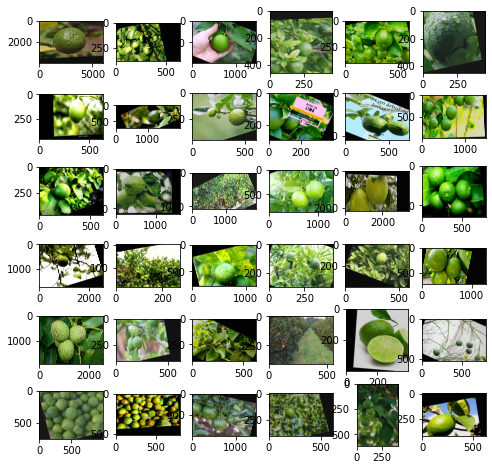

In [18]:
%matplotlib inline

fig = plt.figure(figsize=(8, 8))
columns = 6
rows = 6
for i in range(1, columns*rows +1):
    images_aug[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(images_aug[i])
plt.show()

Link to package documentation:
https://imgaug.readthedocs.io/en/latest/source/examples_basics.html#a-standard-use-case

In [10]:
#This function will store as many augmented/transformed images as you want on new folder

def image_number(number,name_path):
  root = "/content"
  dir = os.path.join(root,name_path)
  os.mkdir(dir)
  print("Your",f'{dir}',"folder was created!")

  image_counting = 0
  while image_counting <= number:
    seq = iaa.Sequential([
      iaa.Fliplr(0.5), # horizontal flips
      iaa.Crop(percent=(0, 0.1)), # random crops
      # Small gaussian blur with random sigma between 0 and 0.5.
      # But we only blur about 50% of all images.
      iaa.Sometimes(
        0.5,iaa.GaussianBlur(sigma=(0, 0.5))
      ),
      iaa.LinearContrast((0.75, 1.5)),
      iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
      iaa.Multiply((0.8, 1.2), per_channel=0.2),
      iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-25, 25),
        shear=(-8, 8)
      )
      ], random_order=True) 
    images_aug = seq(images=imgs) 
    
    for index,image_matrix in enumerate(images_aug):
      if image_counting <= number:
        image_counting += 1
        img_2 = Image.fromarray(image_matrix)
        img_2.save(dir +"/" + str(index) + ".jpg")
        print("processing images...",image_counting)
      else:
        break
  print("---------------------\n Processed Images: ",image_counting)    
  return 

In [19]:
image_number(1000,"custom_inmature_orange")

Your /content/custom_inmature_orange folder was created!
processing images... 1
processing images... 2
processing images... 3
processing images... 4
processing images... 5
processing images... 6
processing images... 7
processing images... 8
processing images... 9
processing images... 10
processing images... 11
processing images... 12
processing images... 13
processing images... 14
processing images... 15
processing images... 16
processing images... 17
processing images... 18
processing images... 19
processing images... 20
processing images... 21
processing images... 22
processing images... 23
processing images... 24
processing images... 25
processing images... 26
processing images... 27
processing images... 28
processing images... 29
processing images... 30
processing images... 31
processing images... 32
processing images... 33
processing images... 34
processing images... 35
processing images... 36
processing images... 37
processing images... 38
processing images... 39
processing image

In [20]:
#load new images:
imgs_2 = []

path_imgs_2 = glob.glob("/content/custom_inmature_orange/*")

for img_path in path_imgs_2:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    imgs_2.append(img)

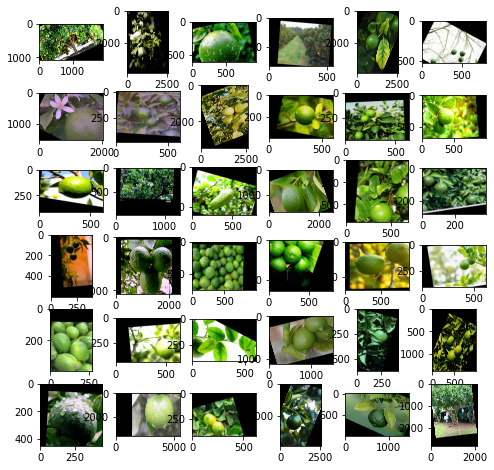

In [21]:
#Show new folder stored images:

%matplotlib inline

fig = plt.figure(figsize=(8, 8))
columns = 6
rows = 6
for i in range(1, columns*rows +1):
    imgs_2[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(imgs_2[i])
plt.show()